# Normal Linear Regression



In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df = pd.read_csv('Salary_Data.csv')
X = df.iloc[:,0]                      # selecting index of data from the 0th value
y = df.iloc[:,1]
df.head()             

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 1/3.0, random_state=0)
X_train = X_train.values.reshape(-1,1)

In [4]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

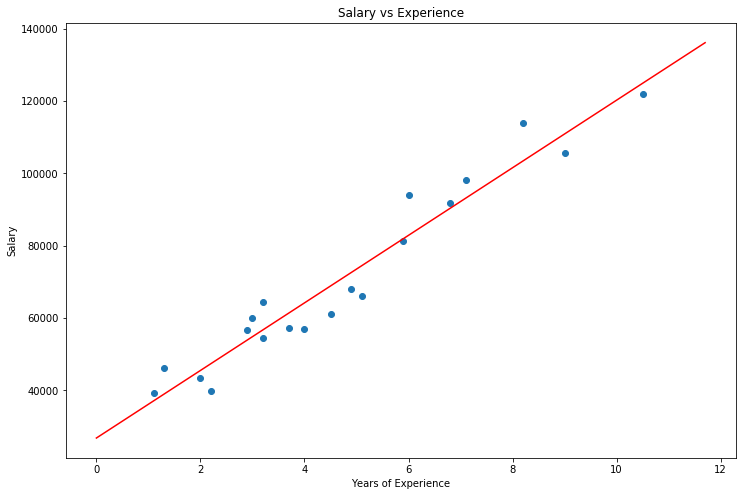

In [5]:
# Data Visualization
fig = plt.figure(figsize=(12,8))
plt.scatter(X_train,y_train)
plt.plot(np.arange(0,12,0.3),                # Value ranging from 0 to 12 with 0.3 step
regressor.predict(np.arange(0,12,0.3).reshape(-1,1)),color='red')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Polynomial regression

In [7]:
# import libraries like that of the top one
df = pd. read_csv('Position_Salaries.csv')
X = df.iloc[:,1:2]
y = df.iloc[:,2]
X
y

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64

In [8]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
from sklearn.preprocessing import PolynomialFeatures  #Creating polynomial eqn with degrees 2 and 3
poly_reg_2 = PolynomialFeatures(degree=2)
poly_reg_3 = PolynomialFeatures(degree=3)
X_poly_2 = poly_reg_2.fit_transform(X)
X_poly_3 = poly_reg_3.fit_transform(X)
lin_reg_poly_2 = LinearRegression().fit(X_poly_2,y)
lin_reg_poly_3 = LinearRegression().fit(X_poly_3,y)

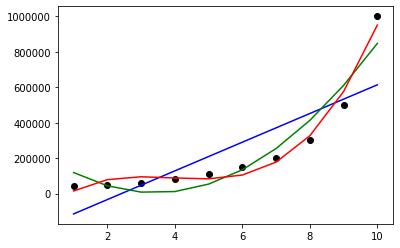

In [13]:
# Data Visualization
plt.scatter(X,y,color="black")
plt.plot(X,lin_reg.predict(X),color='b')
plt.plot(X,lin_reg_poly_2.predict(poly_reg_2.fit_transform(X)),color='g')
plt.plot(X,lin_reg_poly_3.predict(poly_reg_3.fit_transform(X)),color='r')
plt.show()

# Backward Elimination

In [14]:
# Import libraries as above
#Startups data loading
df = pd.read_csv('50_startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [20]:
X = df.iloc[:,-2]
y = df['Profit']
print(X)                       # Both X and y are the same at -1 iloc value of X

0       New York
1     California
2        Florida
3       New York
4        Florida
5       New York
6     California
7        Florida
8       New York
9     California
10       Florida
11    California
12       Florida
13    California
14       Florida
15      New York
16    California
17      New York
18       Florida
19      New York
20    California
21      New York
22       Florida
23       Florida
24      New York
25    California
26       Florida
27      New York
28       Florida
29      New York
30       Florida
31      New York
32    California
33       Florida
34    California
35      New York
36       Florida
37    California
38      New York
39    California
40    California
41       Florida
42    California
43      New York
44    California
45      New York
46       Florida
47    California
48      New York
49    California
Name: State, dtype: object


In [19]:
# Hot encoding
# X = pd.get_dummies(X,columns = ['State'])
# X.head()

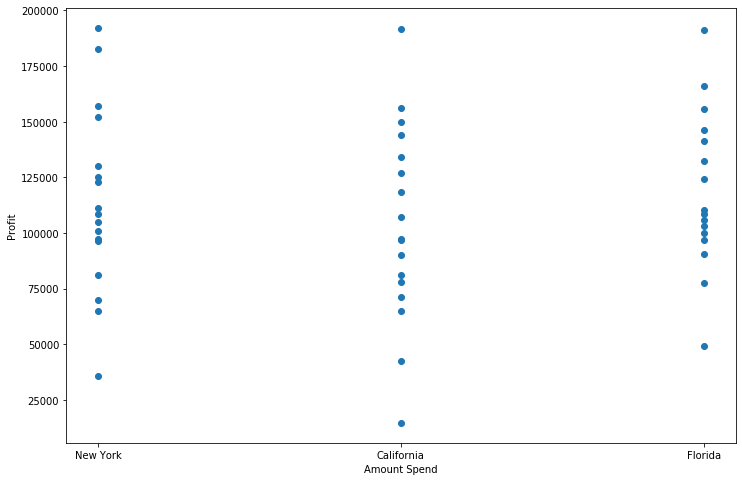

In [21]:
from sklearn.linear_model import LinearRegression
fig = plt.figure(figsize=(12,8))
plt.scatter(X,y)
plt.xlabel('Amount Spend')
plt.ylabel('Profit')
plt.show()

# Robust Regression

In [23]:
# Import necessary modules as done before
X = np.linspace(1,100,100)                           # 100 random values with differentiation of 1
X
y = X*2

In [24]:
y[10:30] = np.random.rand(20)*120+100

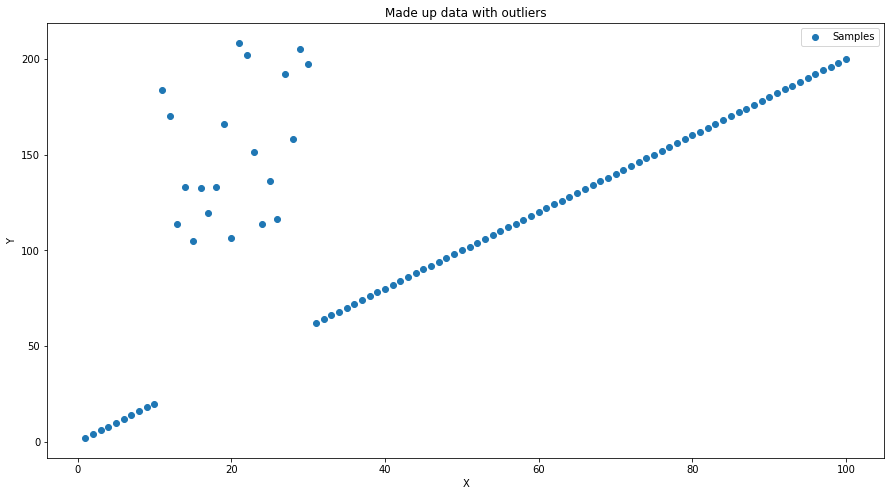

In [28]:
# Reshaping x and y coordinates, with only one feature
X = X.reshape(-1,1)
y = y.reshape(-1,1)

# Data Visualization
def plot(clf=None,clf_name="",color=None):
    fig = plt.figure(figsize=(15,8))
    plt.scatter(X,y,label = 'Samples')
    plt.title("Made up data with outliers")
    if clf is not None:
        y_pred = clf.predict(X)
        plt.plot(X,y_pred,label=clf_name,color=color)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.show()
    
plot()

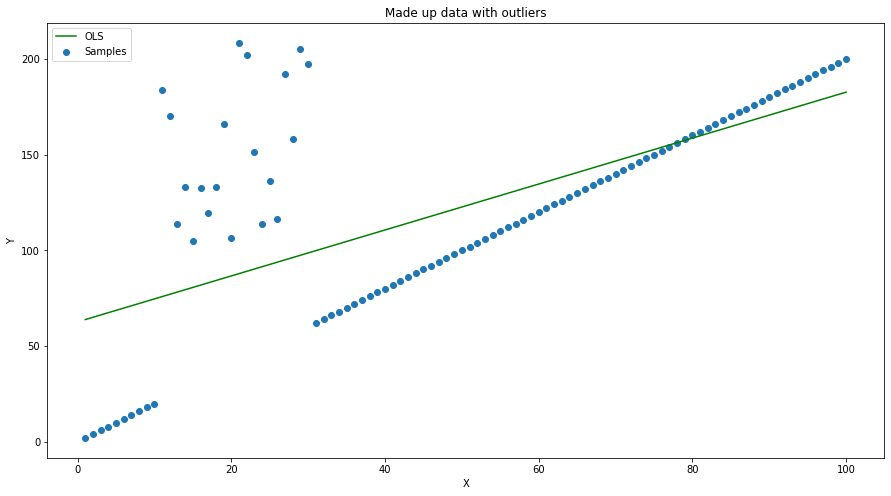

In [29]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X,y)
plot(lr,"OLS", "green")


C:\Users\VenkyTheGreat\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


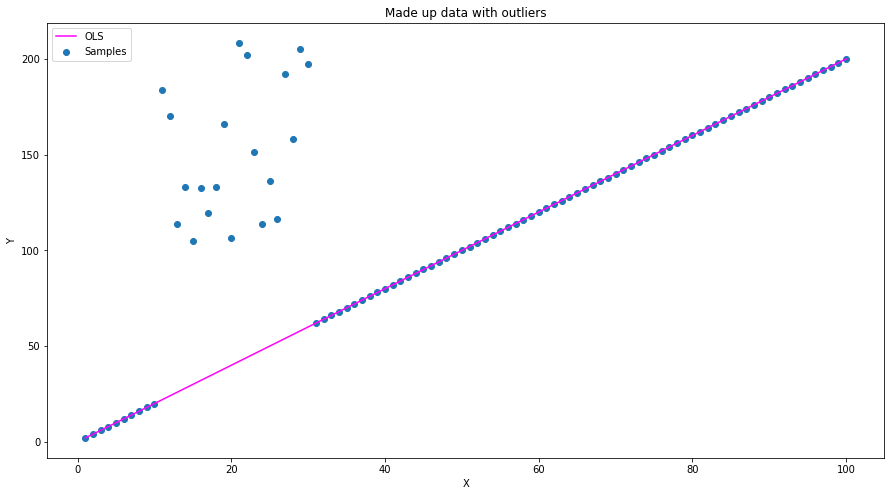

In [31]:
from sklearn.linear_model import TheilSenRegressor
tr = TheilSenRegressor().fit(X,y)
plot(tr,"OLS","magenta")

# Logistic Regression

In [32]:
# importing module
# Visualization of data
import seaborn as sns
%matplotlib inline


In [33]:
train = pd.read_csv('train.csv')
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [35]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [36]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


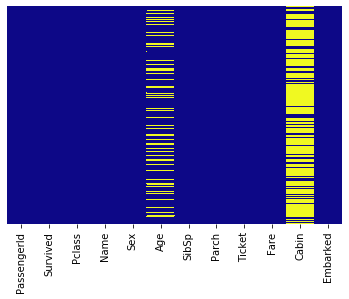

In [37]:
# data visualization of logistic regression
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='plasma')

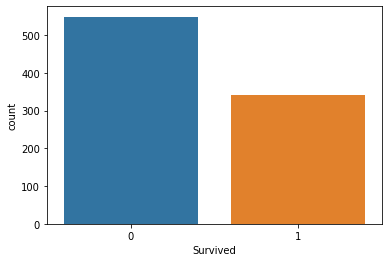

In [38]:
sns.countplot(x='Survived',data=train)

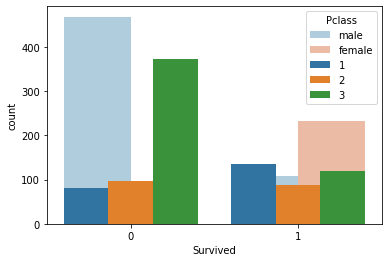

In [39]:
sns.countplot(x='Survived',data=train,hue='Sex',palette='RdBu_r')
sns.countplot(x = 'Survived',data=train,hue='Pclass')

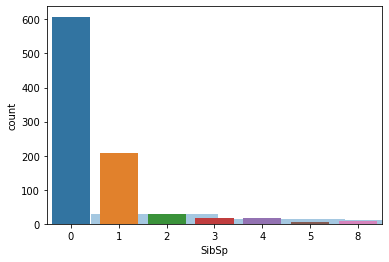

In [42]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30)
sns.countplot(x="SibSp",data=train)

<Figure size 720x504 with 0 Axes>

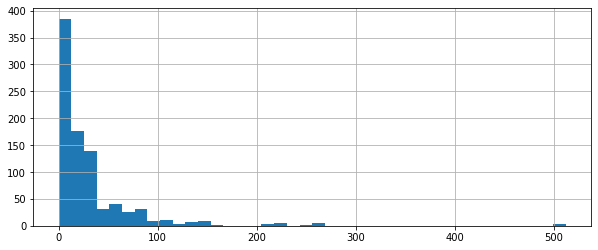

<Figure size 720x504 with 0 Axes>

In [43]:
train['Fare'].hist(bins=40,figsize=(10,4))
plt.figure(figsize=(10,7))

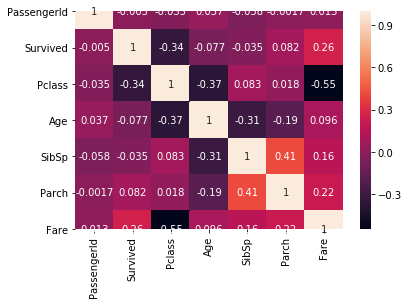

In [44]:
sns.heatmap(train.corr(),annot=True)

# Implementing kmeans clustering



In [2]:
# import libraries
from copy import deepcopy            # copy from clipboard
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')

In [4]:
# Importing the dataset
data = pd.read_csv('xclara.csv')
print('Input Data and Shape')
print(data.shape)
data.head()

Input Data and Shape
(3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


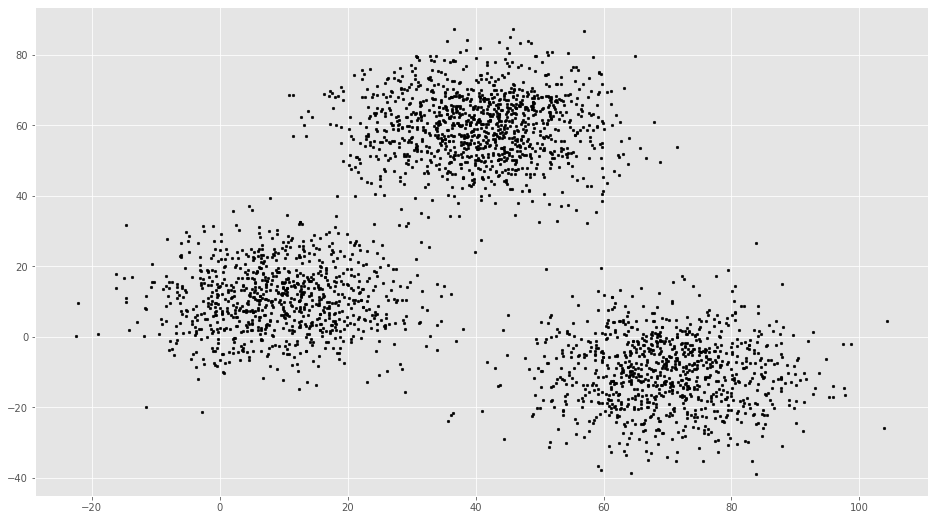

In [5]:
f1 = data['V1'].values
f2 = data['V2'].values
X = np.array(list(zip(f1,f2)))
plt.scatter(f1,f2,c = 'black',s=7)                     # Slope dimension is 7

In [6]:
# Euclidean distance

def dist(a,b,ax=1):
    return np.linalg.norm(a-b,axis=ax)
k=3
C_x = np.random.randint(0,np.max(X)-20,size=k)
C_y = np.random.randint(0,np.max(X)-20,size=k)

C = np.array(list(zip(C_x,C_y)),dtype = np.float32)
print("Initial Centroids")
print(C)

Initial Centroids
[[71. 71.]
 [10. 70.]
 [20. 62.]]


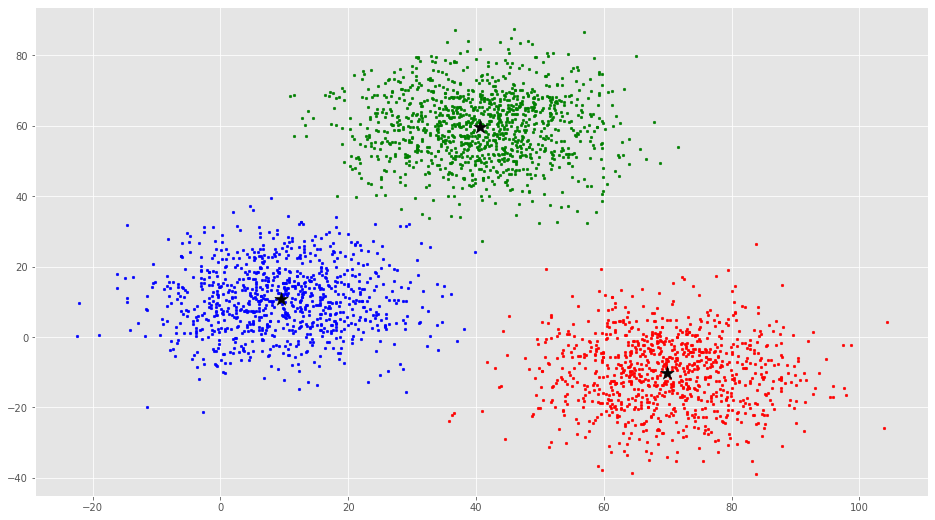

In [9]:
C_old = np.zeros(C.shape)
# Cluster labels (0,1,2)
clusters = np.zeros(len(X))
# Error function which calculates distance between new and old centroids
error = dist(C,C_old,None)
while error!= 0:
    for i in range(len(X)):
        distances = dist(X[i],C)
        cluster = np.argmin(distances)
        clusters[i]= cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range (len(X)) if clusters[j] == i]
        C[i] = np.mean(points,axis=0)
    error = dist(C,C_old,None)
    
colors = ['r','g','b','y','c','m']
fig,ax = plt.subplots()
for i in range(k):
    points = np.array([X[j] for j in range(len(X)) if clusters[j]== i])
    ax.scatter(points[:,0],points[:,1],s=7,c=colors[i])
ax.scatter(C[:,0],C[:,1],marker='*',s=200,c='#050505')

In [13]:
# No of clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans = kmeans.fit(X)
# Getting cluster labels 
labels = kmeans.predict(X)
# Centroid Values
centroids = kmeans.cluster_centers_

In [14]:
# Comparing with scikit-learn centroids
print("Centroid Values")
print("Scratch")
print(C)  # from scratch
print("sklearn")
print(centroids)

Centroid Values
Scratch
[[ 69.92419  -10.119641]
 [ 40.683628  59.715893]
 [  9.478045  10.686052]]
sklearn
[[  9.4780459   10.686052  ]
 [ 40.68362784  59.71589274]
 [ 69.92418447 -10.11964119]]


# Time Series

In [1]:
# import modules
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [2]:
import tensorflow as tf

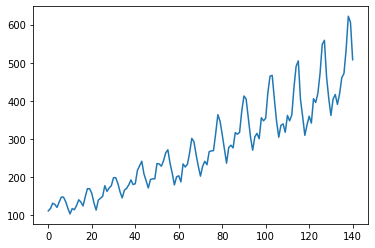

In [3]:
# load the dataset
dataframe = read_csv('Airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
# Change integer to float
dataset = dataset.astype('float32')

plt.plot(dataset)
plt.show()


In [4]:
# X is the number of passengers at a given time (t) and Y is the number of passengers at the next time (t + 1).

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

# fix random seed for reproducibility
numpy.random.seed(7)

In [5]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]



In [6]:
# use this function to prepare the train and test datasets for modeling
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)



In [7]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [9]:
# Create and fit LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4,batch_input_shape = (batch_size, look_back,1),stateful = True, return_sequences = True))
model.add(LSTM(4,batch_input_shape = (batch_size, look_back,1),stateful = True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer = 'adam')
for i in range(100):
    model.fit(trainX,trainY,epochs=1, batch_size = batch_size, verbose = 2,shuffle=False)

Train on 92 samples
92/92 - 8s - loss: 0.0046
Train on 92 samples
92/92 - 0s - loss: 0.0190
Train on 92 samples
92/92 - 1s - loss: 0.0154
Train on 92 samples
92/92 - 0s - loss: 0.0137
Train on 92 samples
92/92 - 0s - loss: 0.0126
Train on 92 samples
92/92 - 0s - loss: 0.0117
Train on 92 samples
92/92 - 0s - loss: 0.0109
Train on 92 samples
92/92 - 0s - loss: 0.0103
Train on 92 samples
92/92 - 0s - loss: 0.0096
Train on 92 samples
92/92 - 0s - loss: 0.0091
Train on 92 samples
92/92 - 0s - loss: 0.0086
Train on 92 samples
92/92 - 0s - loss: 0.0081
Train on 92 samples
92/92 - 0s - loss: 0.0076
Train on 92 samples
92/92 - 0s - loss: 0.0071
Train on 92 samples
92/92 - 0s - loss: 0.0067
Train on 92 samples
92/92 - 1s - loss: 0.0063
Train on 92 samples
92/92 - 1s - loss: 0.0059
Train on 92 samples
92/92 - 1s - loss: 0.0055
Train on 92 samples
92/92 - 1s - loss: 0.0052
Train on 92 samples
92/92 - 1s - loss: 0.0048
Train on 92 samples
92/92 - 1s - loss: 0.0045
Train on 92 samples
92/92 - 1s - l

In [10]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [11]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [12]:
# Calculate mean squared error

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 20.03 RMSE
Test Score: 47.15 RMSE


In [13]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict


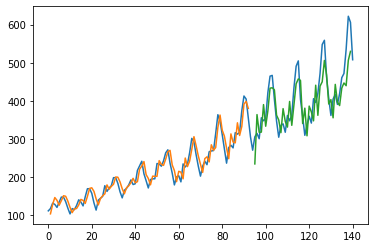

In [14]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Time Series Bitcoin

In [1]:
# Importing the packages
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
import pylab as p
from collections import Counter
import re
import numpy as dragon

In [2]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

In [4]:
train = pd.read_csv('bitcoin_data_aug2017.csv',parse_dates=['Date']).fillna(0)
print(train.head())

        Date      Open      High      Low      Close          Volume  \
0 2017-08-07  3,212.78  3,397.68  3,180.89  3,378.94  1,48,22,79,936   
1 2017-08-06  3,257.61  3,293.29  3,155.60  3,213.94  1,10,50,30,016   
2 2017-08-05  2,897.63  3,290.01  2,874.83  3,252.91  1,94,56,99,968   
3 2017-08-04  2,806.93  2,899.33  2,743.72  2,895.89  1,00,21,20,000   
4 2017-08-03  2,709.56  2,813.31  2,685.14  2,804.73    80,47,96,992   

        Market Cap  
0  55,73,41,79,251  
1  53,00,64,26,108  
2  53,64,34,52,554  
3  47,74,94,61,443  
4  46,23,99,70,790  


In [6]:
data = train['Close']
Date1 = train['Date']


In [7]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 7 columns):
Date          7 non-null datetime64[ns]
Open          7 non-null object
High          7 non-null object
Low           7 non-null object
Close         7 non-null object
Volume        7 non-null object
Market Cap    7 non-null object
dtypes: datetime64[ns](1), object(6)
memory usage: 520.0+ bytes
None


In [8]:
train1 = train[['Date','Close']]
train1.head()

,Date,Close
0,2017-08-07,"3,378.94"
1,2017-08-06,"3,213.94"
2,2017-08-05,"3,252.91"
3,2017-08-04,"2,895.89"
4,2017-08-03,"2,804.73"


In [9]:
# Setting the Date as Index
train2 = train1.set_index('Date')
train2.sort_index(inplace=True)
print (type(train2))
print (train2.head())

<class 'pandas.core.frame.DataFrame'>
               Close
Date                
2017-08-01  2,718.26
2017-08-02  2,710.67
2017-08-03  2,804.73
2017-08-04  2,895.89
2017-08-05  3,252.91


Text(0.5, 1.0, 'Closing price distribution of bitcoin')

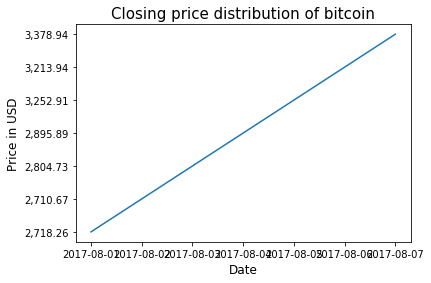

In [11]:
plot.plot(train2['Close'])
plot.xlabel('Date', fontsize=12)
plot.ylabel('Price in USD', fontsize=12)
plot.title("Closing price distribution of bitcoin", fontsize=15)

# Classification

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
fruits = pd.read_table('fruit_data_with_colors.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
print(fruits['fruit_name'].unique())
print(fruits.shape)

['apple' 'mandarin' 'orange' 'lemon']
(59, 7)


In [4]:
print(fruits.groupby('fruit_name').size())

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


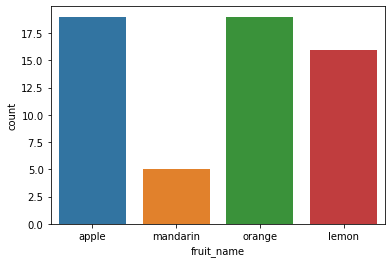

In [5]:
import seaborn as sns
sns.countplot(fruits['fruit_name'], label = 'Count')

mass              AxesSubplot(0.125,0.536818;0.352273x0.343182)
width          AxesSubplot(0.547727,0.536818;0.352273x0.343182)
height               AxesSubplot(0.125,0.125;0.352273x0.343182)
color_score       AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

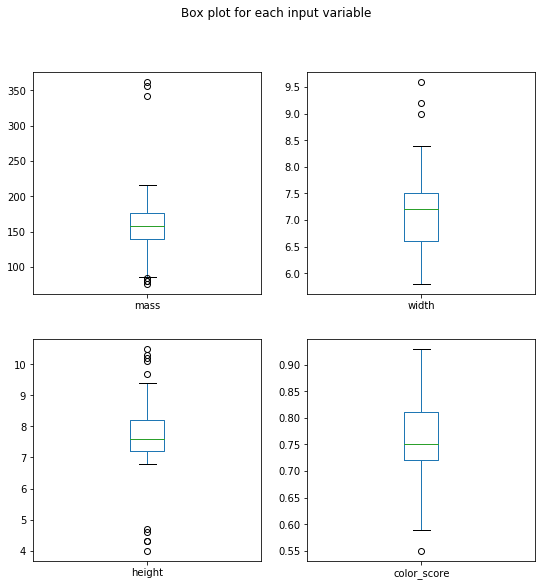

In [6]:
fruits.drop('fruit_label', axis=1).plot(kind='box', subplots=True, layout = (2,2), sharex=False, sharey=False,figsize=(9,9),title='Box plot for each input variable')

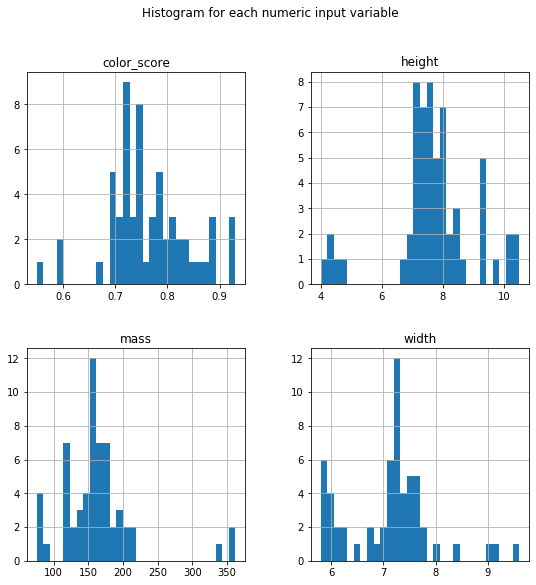

In [7]:
# histogram plots
import pylab as pl
fruits.drop('fruit_label',axis=1).hist(bins=30,figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.show()

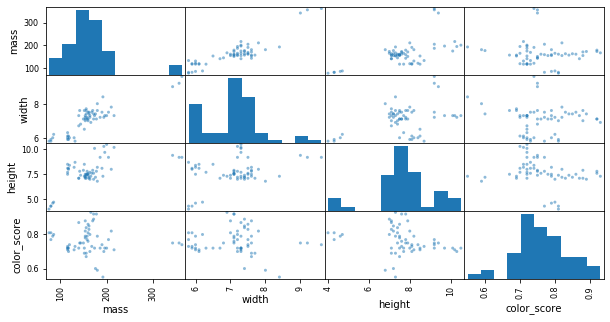

In [8]:
from pandas.plotting import scatter_matrix
scatter_matrix(fruits.drop('fruit_label',axis=1),figsize = (10,5))
plt.show()
feature_names = ['mass','width','height','color_score']
X = fruits[feature_names]
y = fruits['fruit_label']

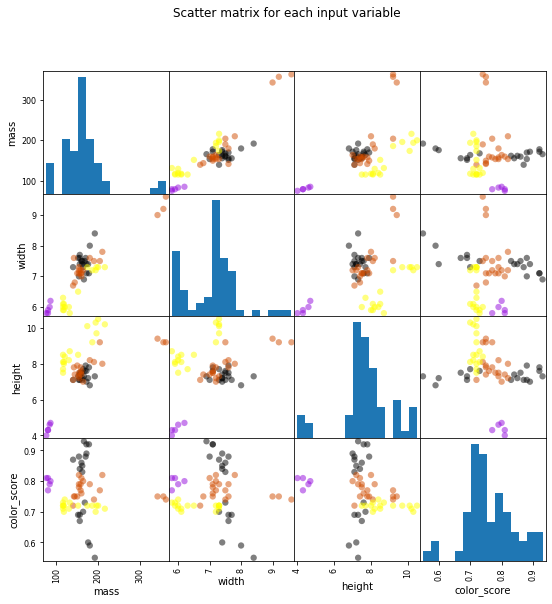

In [9]:
from matplotlib import cm
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X,c=y,marker='o',s=40,hist_kwds={'bins':15},figsize=(9,9),cmap=cmap)
plt.suptitle('Scatter matrix for each input variable')
plt.show()

In [10]:
# Create training and testing sets

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [11]:
print(X_train)
print(X_test)

[[0.27857143 0.41176471 0.49230769 0.72972973]
 [0.35       0.44117647 0.93846154 0.45945946]
 [0.         0.         0.         0.7027027 ]
 [0.27142857 0.52941176 0.50769231 0.37837838]
 [0.31428571 0.41176471 0.46153846 0.67567568]
 [0.2        0.         0.72307692 0.48648649]
 [0.3        0.35294118 0.52307692 0.7027027 ]
 [0.27857143 0.44117647 0.50769231 0.64864865]
 [0.14285714 0.02941176 0.63076923 0.48648649]
 [0.30714286 0.5        0.47692308 0.75675676]
 [0.14285714 0.14705882 0.56923077 0.45945946]
 [0.45714286 0.5        0.8        0.59459459]
 [0.28571429 0.55882353 0.47692308 0.37837838]
 [0.01428571 0.         0.04615385 0.59459459]
 [0.47857143 0.58823529 0.61538462 0.72972973]
 [0.28571429 0.52941176 0.53846154 0.32432432]
 [0.19285714 0.05882353 0.64615385 0.43243243]
 [0.3        0.5        0.53846154 0.83783784]
 [0.14285714 0.05882353 0.53846154 0.45945946]
 [0.36428571 0.38235294 0.58461538 1.        ]
 [0.31428571 0.44117647 0.56923077 0.40540541]
 [1.         

In [12]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on testing set: {:.2f}'.format(logreg.score(X_test,y_test)))

C:\Users\VenkyTheGreat\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\VenkyTheGreat\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy of Logistic regression classifier on training set: 0.70
Accuracy of Logistic regression classifier on testing set: 0.40


In [14]:
# Decision Tree 
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train,y_train)
print('Accuracy of Decision tree classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Decision tree classifier on testing set: {:.2f}'.format(clf.score(X_test,y_test)))

clf2 = DecisionTreeClassifier(max_depth=3).fit(X_train,y_train)
print('Accuracy of Decision tree classifier on training set: {:.2f}'.format(clf2.score(X_train, y_train)))
print('Accuracy of Decision tree classifier on testing set: {:.2f}'.format(clf2.score(X_test,y_test)))


Accuracy of Decision tree classifier on training set: 1.00
Accuracy of Decision tree classifier on testing set: 0.67
Accuracy of Decision tree classifier on training set: 0.89
Accuracy of Decision tree classifier on testing set: 0.53


In [18]:
# k Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()  #Initialization
knn.fit(X_train,y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on testing set: {:.2f}'.format(knn.score(X_test,y_test)))                                                               
                                                            

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on testing set: 0.80


In [19]:
# Linear Discriminant Analyst
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'.format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on testing set: {:.2f}'.format(lda.score(X_test,y_test)))      

Accuracy of LDA classifier on training set: 0.86
Accuracy of LDA classifier on testing set: 0.73


In [20]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'.format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on testing set: {:.2f}'.format(gnb.score(X_test,y_test)))  

Accuracy of GNB classifier on training set: 0.86
Accuracy of GNB classifier on testing set: 0.47


In [43]:
# Support Vector Machine
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

C:\Users\VenkyTheGreat\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of SVM classifier on training set: 0.91
Accuracy of SVM classifier on test set: 0.47


In [44]:
# Classification report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[0 0 4 0]
 [0 0 1 0]
 [0 0 8 0]
 [0 0 2 0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         1
           3       0.53      1.00      0.70         8
           4       0.00      0.00      0.00         2

    accuracy                           0.53        15
   macro avg       0.13      0.25      0.17        15
weighted avg       0.28      0.53      0.37        15



C:\Users\VenkyTheGreat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [26]:
# Plotting decision boundaries
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap,BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches

X = fruits[['mass','width','height','color_score']]
y = fruits['fruit_label']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
X_test

,mass,width,height,color_score
26,362,9.6,9.2,0.74
35,150,7.1,7.9,0.75
43,194,7.2,10.3,0.70
28,140,6.7,7.1,0.72
11,172,7.1,7.6,0.92
2,176,7.4,7.2,0.60
34,142,7.6,7.8,0.75
46,216,7.3,10.2,0.71
40,154,7.1,7.5,0.78
22,140,7.3,7.1,0.87


In [39]:
# Plot Decision Boundaries

def plot_fruit_knn(X,y,n_neighbors,weights):
    X_mat = X[['height','width']].as_matrix()
    y_mat = y.as_matrix()
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF','#AFAFAF'])
    cmap_bold = ListedColormap(['#FF0000','#00FF00','#0000FF','#AFAFAF'])
    
     
    clf = KNeighborsClassifier(n_neighbors,weights=weights)
    clf.fit(X_mat,y_mat)
    
    mesh_step_size = .01  # step in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx,yy,Z,cmap = cmap_light)
    
    # Plot training points
    plt.scatter(X_mat[:,0],X_mat[:,1],s=plot_symbol_size,c=y,cmap=cmap_bold,edgecolor = 'black')
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    
    patch0 = mpatches.Patch(color='#FF0000',label = 'apple')
    patch1 = mpatches.Patch(color='#00FF00',label = 'mandarin')
    patch2 = mpatches.Patch(color='#0000FF',label = 'orange')
    patch3 = mpatches.Patch(color='#AFAFAF',label = 'lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])
    
    plt.xlabel('height (cm)')
    plt.ylabel('width(cm)')
    plt.title("4-class classification (k=%i, weights = '%s')" % (n_neighbors,weights))
    plt.show()

C:\Users\VenkyTheGreat\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Users\VenkyTheGreat\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


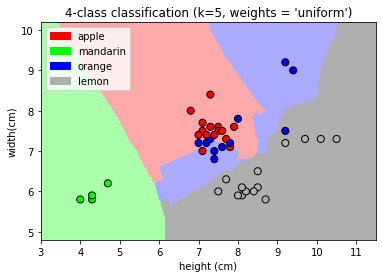

In [40]:
plot_fruit_knn(X_train, y_train,5,'uniform')

C:\Users\VenkyTheGreat\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Users\VenkyTheGreat\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


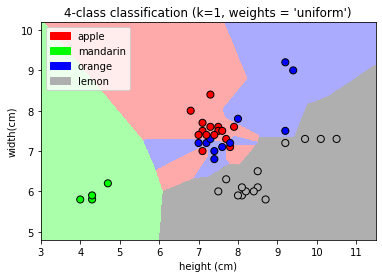

In [42]:
plot_fruit_knn(X_train, y_train,1,'uniform')

([<matplotlib.axis.XTick at 0x2543eb30f28>,
 <a list of 5 Text xticklabel objects>)

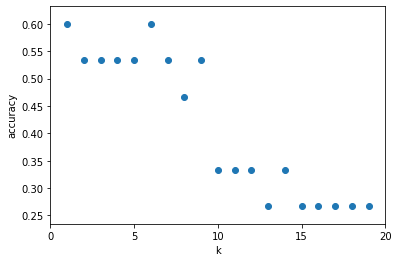

In [45]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])


# Credit card case study


In [1]:
import urllib
import re
import pytz as tz
from datetime import datetime
import numpy as np
np.random.seed(1337)
import pandas as pd
import xlrd

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0,20.0)
plt.rcParams.update({'font.size':10})
plt.rcParams['xtick.major.pad']= '5'
plt.rcParams['ytick.major.pad']= '5'
plt.style.use('ggplot')

In [3]:
# data preparation
import os
import shutil
import wget
datadir = './data'
if not os.path.exists(datadir):
    os.makedirs(datadir)
# Get dataset from UCI
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default of credit card clients.xls'
filename = os.path.join(datadir,'default_credit_card.xls')

if not os.path.isfile(filename):
    wget.download(url,out=filename)
# Convert data
df = pd.read_excel(filename,header = 1)

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
# Clean up of the data
df.columns = [x.lower() for x in df.columns]
df.columns
print("Explanatory variables: {}".format(len(df.columns)-1))
print("Number of Observations: {}".format(df.shape[0]))

df['target'] = df['default payment next month'].astype('category')

# Create a target column for your own convenience
print("Target variable: '{}' -> '{}'".format('default payment next month','target'))

Explanatory variables: 24
Number of Observations: 30000
Target variable: 'default payment next month' -> 'target'


In [6]:
# Payment delays
pattern = re.compile("^pay_[0-9]+$")
pay_status_columns = [x for x in df.columns if (pattern.match(x))]
df[pay_status_columns].head(10)

,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
0,2,2,-1,-1,-2,-2
1,-1,2,0,0,0,2
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,-1,0,-1,0,0,0
5,0,0,0,0,0,0
6,0,0,0,0,0,0
7,0,-1,-1,0,0,-1
8,0,0,2,0,0,0
9,-2,-2,-2,-2,-1,-1


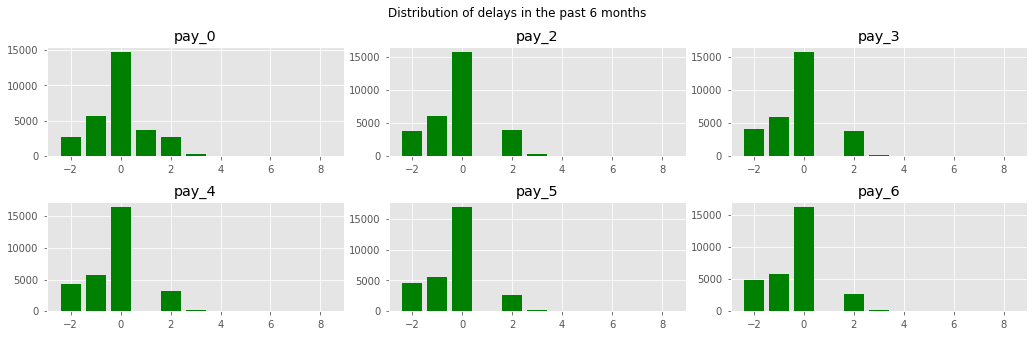

In [7]:
pattern = re.compile("^pay_[0-9]+$") # Regular expression
pay_status_columns = [x for x in df.columns if (pattern.match(x))]
fig,ax = plt.subplots(2,3)
fig.set_size_inches(15,5)
fig.suptitle("Distribution of delays in the past 6 months")
for i in range(len(pay_status_columns)):
    row, col= int(i/3), i%3
    
    d = df[pay_status_columns[i]].value_counts()
    ax[row,col].bar(d.index,d,align = 'center',color='g')
    ax[row,col].set_title(pay_status_columns[i])
    
plt.tight_layout(pad=3.0, w_pad=0.5, h_pad=1.0)
plt.show()

In [8]:
# Standing credit

pattern = re.compile("^bill_amt[0-9]+$")
bill_columns = [x for x in df.columns if(pattern.match(x))]
df[bill_columns].describe()  # describe dataset from bill_columns
df[bill_columns].head(10)

,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6
0,3913,3102,689,0,0,0
1,2682,1725,2682,3272,3455,3261
2,29239,14027,13559,14331,14948,15549
3,46990,48233,49291,28314,28959,29547
4,8617,5670,35835,20940,19146,19131
5,64400,57069,57608,19394,19619,20024
6,367965,412023,445007,542653,483003,473944
7,11876,380,601,221,-159,567
8,11285,14096,12108,12211,11793,3719
9,0,0,0,0,13007,13912


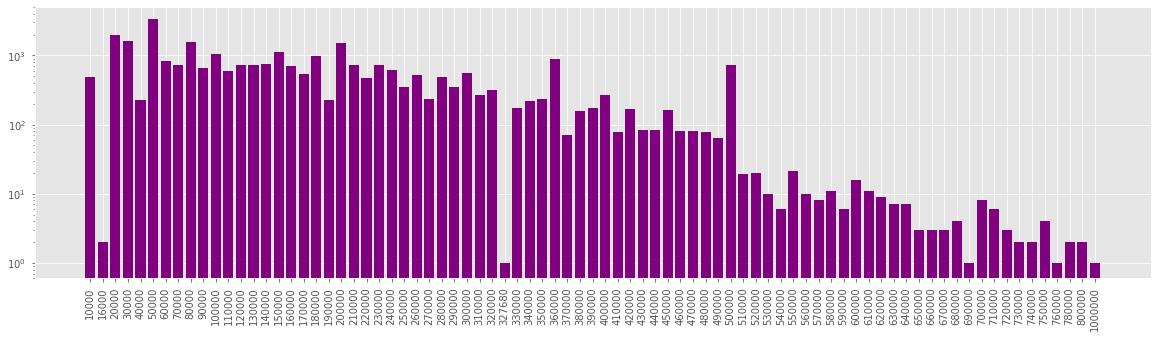

In [9]:
# Plotting structure for limit balance, payments tracked in previous months
pattern = re.compile("^pay_amt[0-9]+$")
pay_amount_columns = [x for x in df.columns if pattern.match(x)]
df[pay_amount_columns].describe()

# limit balance
fig = plt.figure()
fig.set_size_inches(20,5)
ax = fig.add_subplot(111)

# Group by segregation
d = df.groupby(['limit_bal']).size()
ax.set_yscale("log")
ax.set_xticks(np.arange(len(d)))
ax.set_xticklabels(['%d'%i for i in d.index], rotation = 'vertical')
p = ax.bar(np.arange(len(d)),d,color = 'purple')

In [10]:
fig = plt.figure()
fig.set_size_inches(5,5)
d = df.groupby(['target']).size()



<Figure size 360x360 with 0 Axes>

In [ ]:
'''print("defaulting accounts are {}% out of {} observations".format(100* d[1]/(d[1]+d[0]), d[1]+d[0]))
p = d.plot(kind='barh', color='orange')'''

In [11]:
df['sex'] = df['sex'].astype('category').cat.rename_categories(['M', 'F'])
df['marriage'] = df['marriage'].astype('category').cat.rename_categories(['na', 'married', 'single', 'other'])
df['age_cat'] = pd.cut(df['age'], range(0, 100, 10), right=False)
pattern = re.compile("^pay_[0-9]+$")
pay_status_columns = [ x for x in df.columns if (pattern.match(x))]
for i in pay_status_columns:
    df[i] = df[i].astype('category')

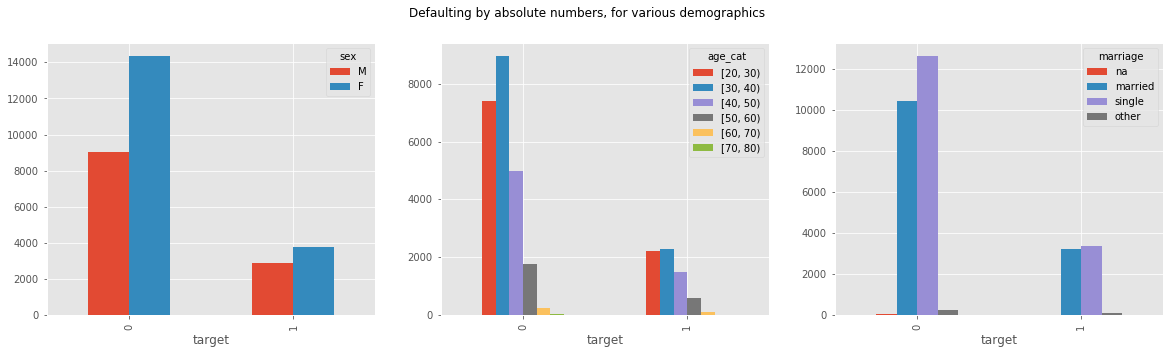

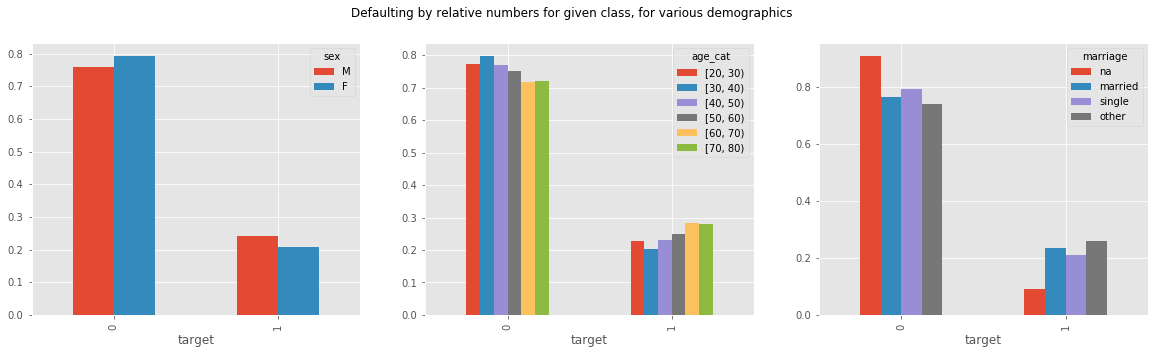

In [19]:
fig,ax = plt.subplots(1,3)
fig.set_size_inches(20,5)
fig.suptitle("Defaulting by absolute numbers, for various demographics")
d =df.groupby(['target','sex']).size()
p = d.unstack(level=1).plot(kind='bar',ax=ax[0])

d =df.groupby(['target','age_cat']).size()
p = d.unstack(level=1).plot(kind='bar',ax=ax[1])

d =df.groupby(['target','marriage']).size()
p = d.unstack(level=1).plot(kind='bar',ax=ax[2])

##### subplot structure
fig,ax = plt.subplots(1,3)
fig.set_size_inches(20,5)
fig.suptitle("Defaulting by relative numbers for given class, for various demographics")

d = df.groupby(['target','sex']).size().unstack(level=1)
d = d/d.sum()
p = d.plot(kind='bar',ax=ax[0])

d = df.groupby(['target','age_cat']).size().unstack(level=1)
d = d/d.sum()
p = d.plot(kind='bar',ax=ax[1])

d = df.groupby(['target','marriage']).size().unstack(level=1)
d = d/d.sum()
p = d.plot(kind='bar',ax=ax[2])

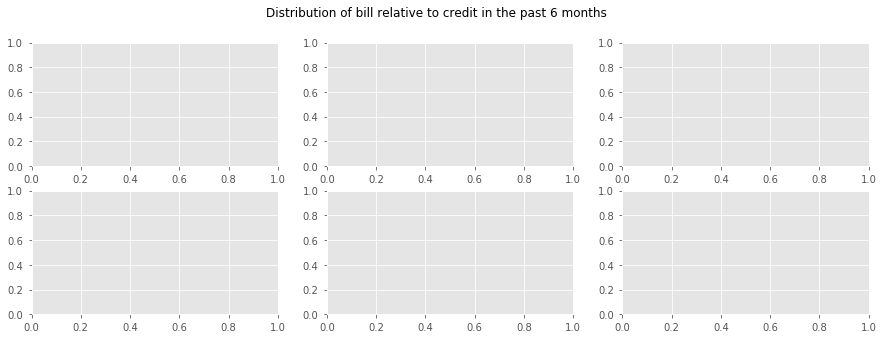

In [22]:
# Feature Engineering, help function
def setcols(prefix,a=1,b=6):
    return [prefix+str(i) for i in np.arange(a,b+1)]

from math import log
from sklearn.neighbors.kde import KernelDensity
pattern = re.compile("^bill_relamt[0-9]+$")
columns = [x for x in df.columns if (pattern.match(x))]

fig,ax = plt.subplots(2,3)
fig.set_size_inches(15,5)
fig.suptitle("Distribution of bill relative to credit in the past 6 months")

df['bill_amt_avg'] = df[setcols('bill_amt')].mean(axis=1)
df['bill_amt_avg_log'] = df['bill_amt_avg'].apply(lambda x:log(x+1) if x>0 else 0)

In [23]:
from patsy import dmatrices
formula = 'target-'

#Original features
formula += 'C(sex) + C(marriage)+ C(education) + age'
formula += '+' + '+'.join(setcols('pay_'))

# Categorical age and credit limit
formula += '+' + 'C(age_cat)'
formula += '+' + 'C(limit_bal_cat)+ limit_bal_log'

# pay delays and pay amount
formula += '+' + 'pay_avg + pay_std'
formula += '+' + 'pay_amt_avg_log'
formula += '+' + '+'.join(setcols('pay_relamt'))
formula += '+' + '+'.join(setcols('pay_amt_avg_log'))

print(formula)

target-C(sex) + C(marriage)+ C(education) + age+pay_1+pay_2+pay_3+pay_4+pay_5+pay_6+C(age_cat)+C(limit_bal_cat)+ limit_bal_log+pay_avg + pay_std+pay_amt_avg_log+pay_relamt1+pay_relamt2+pay_relamt3+pay_relamt4+pay_relamt5+pay_relamt6+pay_amt_avg_log1+pay_amt_avg_log2+pay_amt_avg_log3+pay_amt_avg_log4+pay_amt_avg_log5+pay_amt_avg_log6


In [24]:
# Visualizations
import itertools
from sklearn.metrics import roc_curve,auc,roc_auc_score,log_loss,accuracy_score,confusion_matrix

def plot_cm(ax,y_true,y_pred,classes,title,th=0.5, cmap=plt.cm.Blues):
    y_pred_labels = (y_pred > th). astype(int)
    cm = confusion_matrix(y_true, y_pred_labels)
    
    im = ax.imshow(cm,interpolation='nearest',cmap=cmap)
    ax.set_title(title)
    
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)
    
    thresh = cm.max() / 2
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j,i,cm[i,j],
                horizontalalignment = 'center',
                color = "white" if cm[i,j]> thresh else "black")
        
        ax.set_ylabel('True label')
        ax.set_xlabel('Predicted label')

                
def plot_auc(ax,y_train,y_train_pred,y_test, y_test_pred, th=0.5):
    y_train_pred_labels = (y_train_pred>th).astype(int)
    y_test_pred_labels = (y_test_pred>th).astype(int)
    
    
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
    roc_auc_train = auc(fpr_train, tpr_train)
    acc_train= accuracy_score(y_train,y_train_pred_labels)
    
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    roc_auc_test = auc(fpr_test, tpr_test)
    acc_test = accuracy_score(y_test,y_test_pred_labels)
    
    ax.plot(fpr_train, tpr_train)
    ax.plot(fpr_test, tpr_test)
    
    ax.plot([0,1],[0,1],'k--')
    
    ax.set_xlim([0.0,1.0])
    ax.set_ylim([0.0,1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC curve')
    
    train_text = 'train acc = {:.3f}, auc = {:.2f}'.format(acc_train,roc_auc_train)
    test_text = 'test acc = {:.3f}, auc = {:.2f}'.format(acc_test, roc_auc_test)
    ax.legend([train_text, test_text])

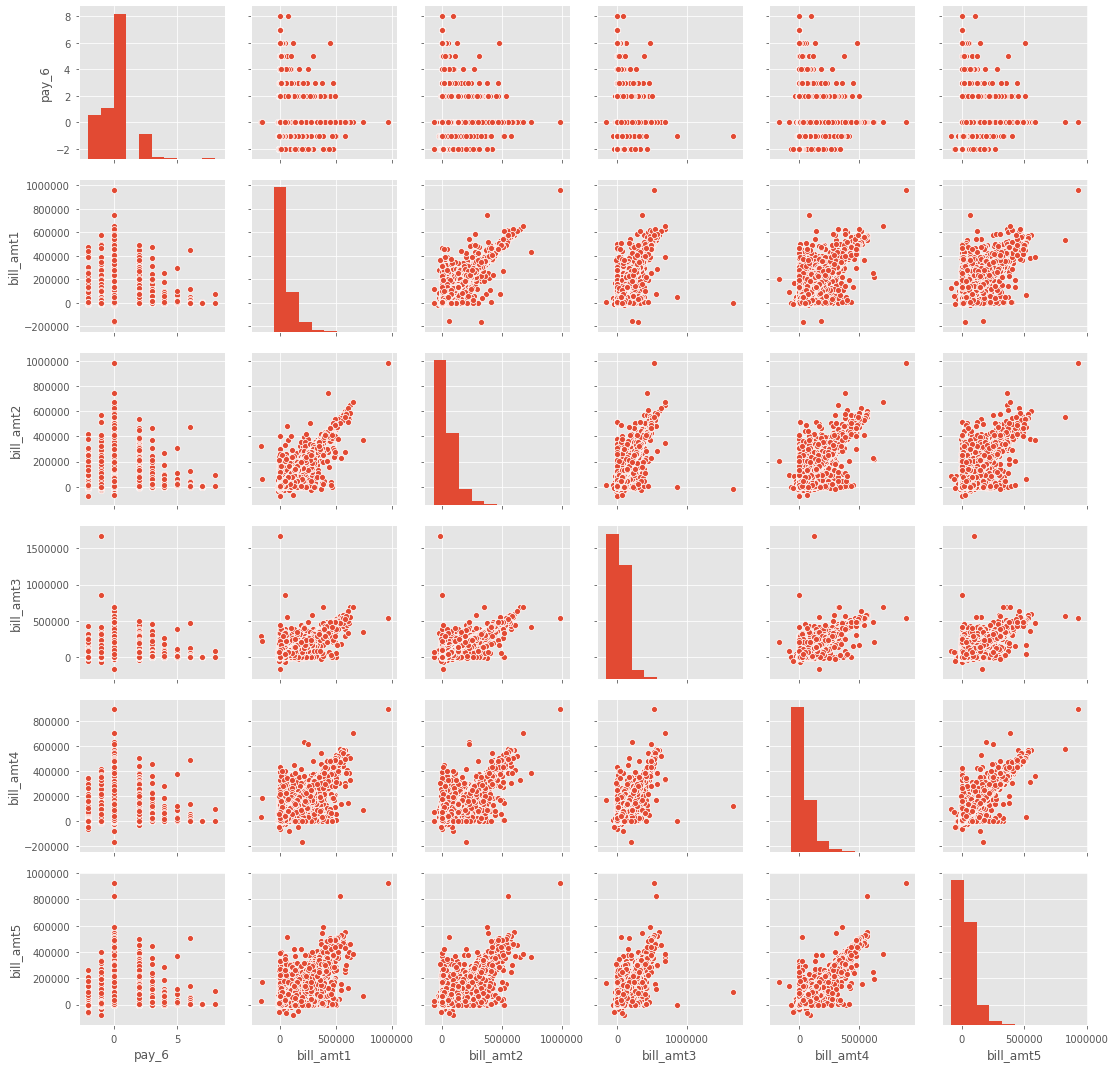

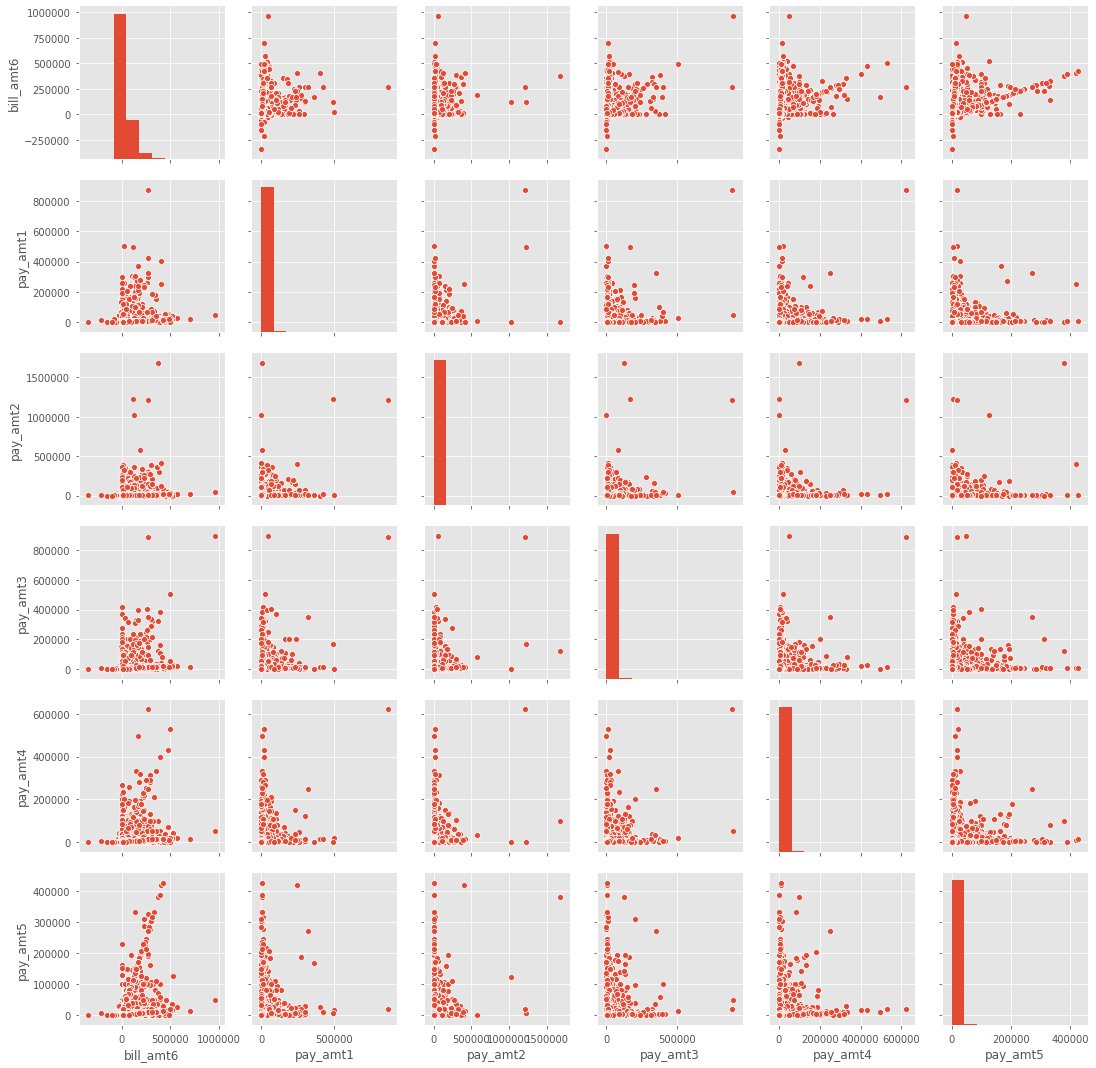

In [25]:
import seaborn as sns
#plot columns with similar names to check the correlation

sns.pairplot(df, vars = df.columns[11:17], kind = 'scatter')
sns.pairplot(df, vars = df.columns[17:23])